In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2


In [4]:
# Define the image size
img_size = (256, 256)

# Define the path to the training set
train_dir = "/content/drive/MyDrive/Eugenia & Thasniya - Term paper/New Plant Diseases Dataset(Augmented)/train"

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.1084 - loss: 5.5159 - val_accuracy: 0.1333 - val_loss: 1.7908
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.1946 - loss: 1.7868 - val_accuracy: 0.3833 - val_loss: 1.7353
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.3927 - loss: 1.6465 - val_accuracy: 0.3667 - val_loss: 1.4454
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.4281 - loss: 1.3619 - val_accuracy: 0.5667 - val_loss: 1.2155
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - accuracy: 0.6063 - loss: 1.0530 - val_accuracy: 0.5667 - val_loss: 1.1482


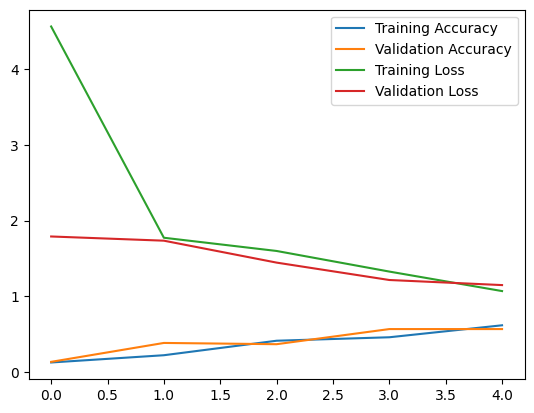

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5653 - loss: 1.2280
Test accuracy: 0.57


In [5]:
# Define the image size
img_size = (256, 256)

# Define the path to the training set
train_dir = "/content/drive/MyDrive/Eugenia & Thasniya - Term paper/New Plant Diseases Dataset(Augmented)/train"

# Load the training data
train_img = []
train_label = []
for folder in os.listdir(train_dir):
    img_list = os.listdir(os.path.join(train_dir, folder))

    for img in img_list:
        img_path = os.path.join(train_dir, folder, img)
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size)
        train_img.append(img)
        if folder == 'Tomato___Septoria_leaf_spot':
            train_label.append(0)
        elif folder == 'Tomato___Spider_mites Two-spotted_spider_mite':
            train_label.append(1)
        elif folder == 'Tomato___Target_Spot':
            train_label.append(2)
        elif folder == 'Tomato___Tomato_Yellow_Leaf_Curl_Virus':
            train_label.append(3)
        elif folder == 'Tomato___Tomato_mosaic_virus':
            train_label.append(4)
        elif folder == 'Tomato___healthy':
            train_label.append(5)

train_img = np.array(train_img)
train_label = np.array(train_label)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(train_img, train_label, test_size=0.2, random_state=42)

# Normalize the input data
x_train = x_train / 255.0
x_val = x_val / 255.0

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    validation_data=(x_val, y_val),
    batch_size=32
)

# Plot the training and validation accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(x_val, y_val)
print(f'Test accuracy: {test_acc:.2f}')

In [6]:
# Single image prediction
img_path = '/content/drive/MyDrive/Eugenia & Thasniya - Term paper/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/Copy of f040657b-3db1-4bb3-bea8-1e821c36e655___UF.GRC_YLCV_Lab 02866.JPG'
img = cv2.imread(img_path)
img = cv2.resize(img, img_size)
img = img / 255.0
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
predicted_label = np.argmax(prediction)

# Map the predicted label to the corresponding disease name
disease_names = {
    0: 'Tomato___Septoria_leaf_spot',
    1: 'Tomato___Spider_mites Two-spotted_spider_mite',
    2: 'Tomato___Target_Spot',
    3: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    4: 'Tomato___Tomato_mosaic_virus',
    5: 'Tomato___healthy'
}

predicted_disease = disease_names[predicted_label]
print(f'Predicted disease: {predicted_disease}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Predicted disease: Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [7]:
import numpy as np
import cv2
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create a VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(6, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Create an ImageDataGenerator to load the images
datagen = ImageDataGenerator(rescale=1./255)

# Load the training and testing data
train_generator = datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32, class_mode='sparse')
test_generator = datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32, class_mode='sparse')

# Train the model
model.fit(train_generator, epochs=3, validation_data=test_generator)

# Make predictions on the test set
y_pred_vgg = model.predict(test_generator)
y_pred_vgg = np.argmax(y_pred_vgg, axis=1)

# Evaluate the VGG16 model
y_pred_vgg = model.predict(test_generator)
y_pred_vgg = np.argmax(y_pred_vgg, axis=1)
y_test = test_generator.classes

accuracy_vgg = accuracy_score(y_test, y_pred_vgg)
print('VGG16 Accuracy:', accuracy_vgg)
print('VGG16 Classification Report:')
print(classification_report(y_test, y_pred_vgg))
print('VGG16 Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_vgg))


Found 300 images belonging to 6 classes.
Found 300 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1087s 116s/step - accuracy: 0.1561 - loss: 60.0742 - val_accuracy: 0.1667 - val_loss: 1.7899
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1073s 110s/step - accuracy: 0.1680 - loss: 1.9067 - val_accuracy: 0.1767 - val_loss: 1.7924
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1107s 113s/step - accuracy: 0.2199 - loss: 1.7927 - val_accuracy: 0.1667 - val_loss: 1.7884
10/10 ━━━━━━━━━━━━━━━━━━━━ 241s 24s/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 248s 24s/step
VGG16 Accuracy: 0.15333333333333332
VGG16 Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.04      0.05        50
           1       0.17      0.70      0.27        50
           2       0.00      0.00      0.00        50
           3       0.14      0.18      0.16        50
           4       0.00      0.00      0.00        50
           5       0.00      0.00      0.00        50

    accuracy                           0.15       300
   macro avg       0.06      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
